### Imports

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

### Gather Data

In [48]:
ticker = 'BTC-USD'
data = yf.download(ticker, start='2023-10-10', end='2024-10-10')


[*********************100%***********************]  1 of 1 completed


### Calculating OBV

In [6]:
def calculate_obv(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['Close'][i] > df['Close'][i-1]:
            obv.append(obv[-1] + df['Volume'][i])
        elif df['Close'][i] < df['Close'][i-1]:
            obv.append(obv[-1] - df['Volume'][i])
        else:
            obv.append(obv[-1])
    return obv

In [49]:
data['OBV'] = calculate_obv(data)

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_13802/4056696399.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Close'][i] > df['Close'][i-1]:
/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_13802/4056696399.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Close'][i] < df['Close'][i-1]:
/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_13802/4056696399.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

In [59]:
data.head(7)

,Open,High,Low,Close,Adj Close,Volume,OBV
Date,,,,,,,
2023-10-10,27589.201172,27715.847656,27301.654297,27391.019531,27391.019531,9973350678,0
2023-10-11,27392.076172,27474.115234,26561.099609,26873.320312,26873.320312,13648094333,-13648094333
2023-10-12,26873.292969,26921.439453,26558.320312,26756.798828,26756.798828,9392909295,-23041003628
2023-10-13,26752.878906,27092.697266,26686.322266,26862.375000,26862.375000,15165312851,-7875690777
2023-10-14,26866.203125,26969.000000,26814.585938,26861.707031,26861.707031,5388116782,-13263807559
2023-10-15,26858.011719,27289.169922,26817.894531,27159.652344,27159.652344,7098201980,-6165605579
2023-10-16,27162.628906,29448.138672,27130.472656,28519.466797,28519.466797,27833876539,21668270960


### Visualization

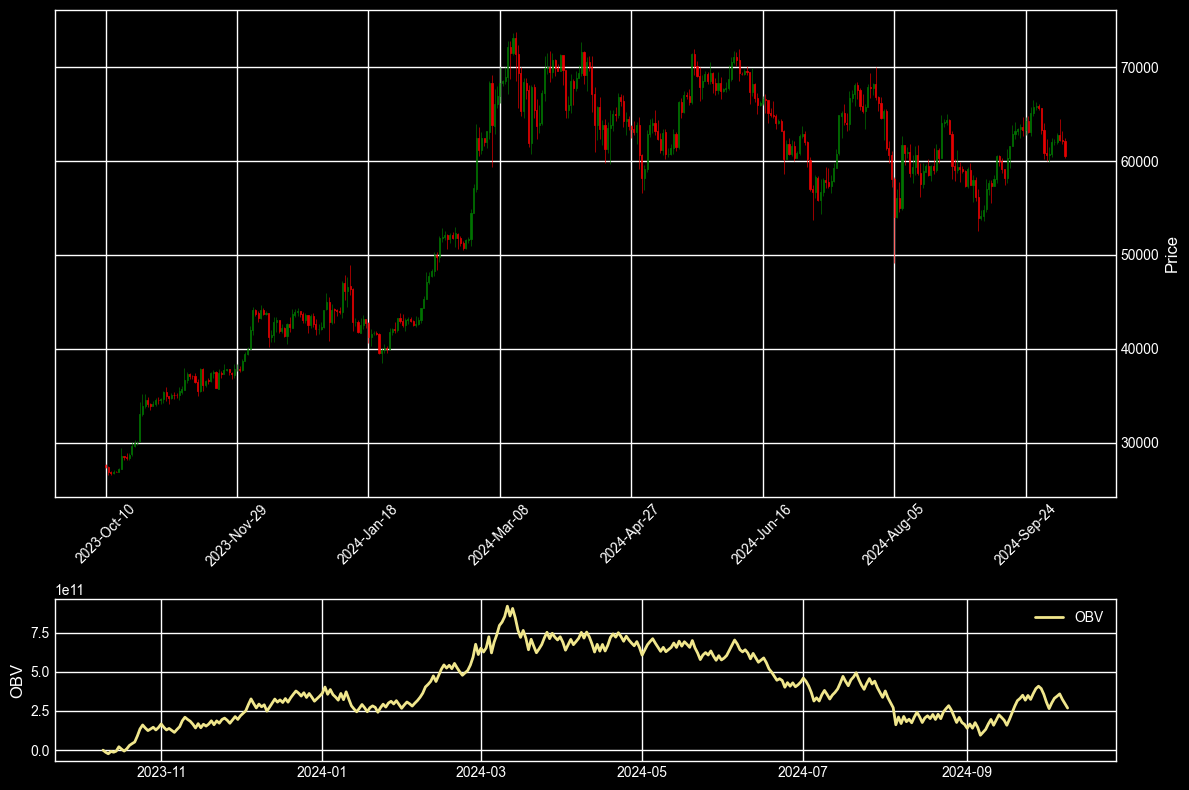

In [64]:
# Create a custom style
my_style = mpf.make_mpf_style(base_mpf_style='yahoo', 
                              marketcolors=mpf.make_marketcolors(up='g', down='r', wick={'up':'green', 'down':'red'}, edge='inherit'),
                              facecolor='lightgray', gridcolor='w')

fig, axlist = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Plot candlestick chart on the first axis with custom style
mpf.plot(data, type='candle', ax=axlist[0], volume=False, style=my_style)

# Plot OBV on the second axis
axlist[1].plot(data.index, data['OBV'], label='OBV', linewidth=2,color='khaki')
axlist[1].set_ylabel('OBV')
axlist[1].legend()

plt.tight_layout()
plt.show()

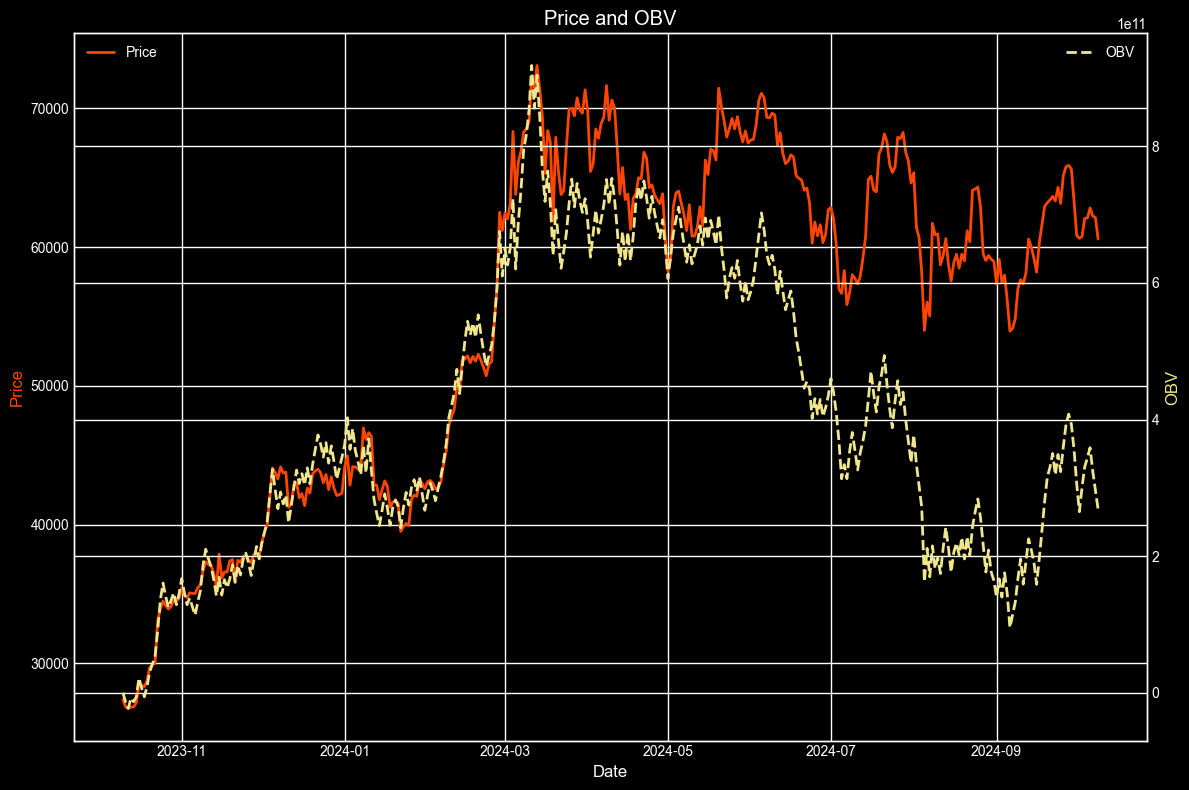

In [58]:
plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(data.index, data['Close'], linewidth=2,label='Price', color='orangered') 
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='orangered')
ax1.tick_params(axis='y', labelcolor='snow')

ax2 = ax1.twinx()
ax2.plot(data.index, data['OBV'], linestyle='--',linewidth=2,label='OBV', color='khaki')
ax2.set_ylabel('OBV', color='khaki')
ax2.tick_params(axis='y', labelcolor='snow')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Price and OBV')
plt.tight_layout()
plt.show()